Purpose: This file attempts to aggregate member's account data based on their counties and their activity and seperate them based on certain thresholds.

# Importing Packages and Data

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

In [53]:
member_level_df = pd.read_csv('data/Member_Level_Dataset.csv')
member_level_df.head()

,Unique_Member_Identifier,EOM_TRANS_DATE,age,BranchCategory,address_zip,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,...,ATMCount,BillPaymentCount,CashCount,DraftCount,ACHCount,FeeCount,Credit_DebitCount,Home_Banking,WireCount,DividendCount
0,360faa7e8e345d2725f92460ca39696ad885b876805328...,2022-01-31,85,Winter Garden,34760,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4ef271022b929dd2ea56f3c0e9a7efae346a07e40f6ea1...,2022-01-31,59,Lake Nona,34771,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,f868c8fb32d526c00024e408fdd712e881de936372bef8...,2022-01-31,38,MetroWest,32765,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4fe6ec028a8a5234bb02fbe97488fb9431109a292ee8bc...,2022-01-31,67,Kissimmee,34744,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,f46df5083939ce116be51669af3315c474655c936204c2...,2022-01-31,47,East Orlando,32825,3,2,1,0,0,...,0,0,0,0,0,1,2,2,0,1


In [54]:
# Map BranchCategory to County
city_to_county_mapping = {
    'Addition Financial Arena': 'Orange',
    'Altamonte Springs': 'Seminole',
    'Apopka': 'Orange',
    'Clermont': 'Lake',
    'Downtown Campus': 'Orange',
    'East Orlando': 'Orange',
    'Eustis': 'Lake',
    'Fern Park': 'Seminole',
    'Kissimmee': 'Osceola',
    'Lake Mary': 'Seminole',
    'Lake Nona': 'Orange',
    'Leesburg': 'Lake',
    'Longwood': 'Seminole',
    'Merritt Island': 'Brevard',
    'MetroWest': 'Orange',
    'Mills': 'Orange',
    'Orange City': 'Volusia',
    'Oviedo': 'Seminole',
    'Pine Hills': 'Orange',
    'Poinciana': 'Polk',
    'Sanford': 'Seminole',
    'Seminole State': 'Seminole',
    'South Orlando': 'Orange',
    'St. Cloud': 'Osceola',
    'The Loop': 'Osceola',
    'UCF Campus': 'Orange',
    'UCF Commons': 'Orange',
    'Winter Garden': 'Orange'
}


# Data Preprocessing

In [55]:
# Remove member identifiers
member_level_df = member_level_df.drop(columns=['Unique_Member_Identifier'])

In [56]:
# Remove the rows that contains 'Virtual Branch' in the 'BranchCategory' column
no_virtual_df = member_level_df[member_level_df['BranchCategory'] != 'Virtual Branch']

In [57]:
# Remove the rows that contains 'High School' in the name in 'BranchCategory' column
no_highschool_df = no_virtual_df[~member_level_df['BranchCategory'].str.contains('High School')]

C:\Users\perez\AppData\Local\Temp\ipykernel_14564\2725168190.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_highschool_df = no_virtual_df[~member_level_df['BranchCategory'].str.contains('High School')]


In [58]:
# Drop empty rows
no_highschool_df = no_highschool_df.dropna()

In [59]:
no_highschool_df.head()

,EOM_TRANS_DATE,age,BranchCategory,address_zip,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,n_open_club_accts,...,ATMCount,BillPaymentCount,CashCount,DraftCount,ACHCount,FeeCount,Credit_DebitCount,Home_Banking,WireCount,DividendCount
0,2022-01-31,85,Winter Garden,34760,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2022-01-31,59,Lake Nona,34771,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2022-01-31,38,MetroWest,32765,2,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,2022-01-31,67,Kissimmee,34744,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2022-01-31,47,East Orlando,32825,3,2,1,0,0,0,...,0,0,0,0,0,1,2,2,0,1


In [60]:
no_highschool_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1620529 entries, 0 to 1661363
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   EOM_TRANS_DATE       1620529 non-null  object
 1   age                  1620529 non-null  int64 
 2   BranchCategory       1620529 non-null  object
 3   address_zip          1620529 non-null  object
 4   n_accts              1620529 non-null  int64 
 5   n_checking_accts     1620529 non-null  int64 
 6   n_savings_accts      1620529 non-null  int64 
 7   n_open_loans         1620529 non-null  int64 
 8   n_open_cds           1620529 non-null  int64 
 9   n_open_club_accts    1620529 non-null  int64 
 10  n_open_credit_cards  1620529 non-null  int64 
 11  ATMCount             1620529 non-null  int64 
 12  BillPaymentCount     1620529 non-null  int64 
 13  CashCount            1620529 non-null  int64 
 14  DraftCount           1620529 non-null  int64 
 15  ACHCount            

In [61]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
no_highschool_df.describe()

,age,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,n_open_club_accts,n_open_credit_cards,ATMCount,BillPaymentCount,CashCount,DraftCount,ACHCount,FeeCount,Credit_DebitCount,Home_Banking,WireCount,DividendCount
count,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000
mean,49.742,2.524,0.939,1.324,0.177,0.220,0.041,0.070,0.033,0.072,0.017,0.082,0.298,0.049,0.484,0.147,0.000,1.049
std,20.408,1.321,0.620,0.713,0.446,0.842,0.198,0.256,0.210,0.368,0.141,0.461,0.735,0.254,1.103,0.670,0.020,1.043
min,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,33.000,2.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
50%,52.000,2.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,66.000,3.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
max,111.000,34.000,7.000,17.000,4.000,32.000,2.000,1.000,12.000,59.000,9.000,12.000,43.000,28.000,78.000,74.000,3.000,56.000


In [62]:
# Displays the number of unique values for each column
no_highschool_df.nunique().sort_values(ascending=False)

address_zip            3860
age                     109
DividendCount            46
Home_Banking             40
Credit_DebitCount        40
ACHCount                 34
n_accts                  29
n_open_cds               27
BranchCategory           26
BillPaymentCount         24
EOM_TRANS_DATE           19
FeeCount                 17
n_savings_accts          15
DraftCount               13
ATMCount                 12
CashCount                 9
n_checking_accts          8
n_open_loans              5
WireCount                 4
n_open_club_accts         3
n_open_credit_cards       2
dtype: int64

In [63]:
county_df = no_highschool_df.copy()

county_df['County'] = county_df['BranchCategory'].map(city_to_county_mapping)

# Load revenue data
file_path = 'data/countyrevenuesbycategory.xlsx'
df_revenue = pd.read_excel(file_path)

# Selecting only 'County' and 'TOTAL - All Revenue Account Codes' columns
df_revenue = df_revenue.iloc[:, [0, -3]]
df_revenue.columns = ['County', 'Revenue_Per_County']
df_revenue = df_revenue.drop(0)

# Merging the DataFrames
county_df = pd.merge(county_df, df_revenue, on='County', how='left')

# Displaying the combined DataFrame
county_df.head()

,EOM_TRANS_DATE,age,BranchCategory,address_zip,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,n_open_club_accts,...,CashCount,DraftCount,ACHCount,FeeCount,Credit_DebitCount,Home_Banking,WireCount,DividendCount,County,Revenue_Per_County
0,2022-01-31,85,Winter Garden,34760,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,Orange,6968835122
1,2022-01-31,59,Lake Nona,34771,2,1,1,0,0,0,...,0,0,0,0,0,0,0,1,Orange,6968835122
2,2022-01-31,38,MetroWest,32765,2,0,1,0,0,1,...,0,0,0,0,0,0,0,1,Orange,6968835122
3,2022-01-31,67,Kissimmee,34744,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,Osceola,1592120547
4,2022-01-31,47,East Orlando,32825,3,2,1,0,0,0,...,0,0,0,1,2,2,0,1,Orange,6968835122


In [64]:
# Assuming 'BranchCategory' uniquely identifies each branch
branch_count = county_df.groupby('County')['BranchCategory'].nunique()
branch_count.name = 'Branch_Count'

# Aggregate the member activity data by the 'County' column, summing up all the activity-related columns
county_activity_agg = county_df.groupby('County').agg({
    'DividendCount': 'sum',
    'Home_Banking': 'sum',
    'Credit_DebitCount': 'sum',
    'ACHCount': 'sum',
    'n_accts': 'sum',
    'n_open_cds': 'sum',
    'BillPaymentCount': 'sum',
    'FeeCount': 'sum',
    'n_savings_accts': 'sum',
    'DraftCount': 'sum',
    'ATMCount': 'sum',
    'CashCount': 'sum',
    'n_checking_accts': 'sum',
    'n_open_loans': 'sum',
    'WireCount': 'sum',
    'n_open_club_accts': 'sum',
    'n_open_credit_cards': 'sum'
}).reset_index()

# Calculate the total Activity per county
county_activity_agg['Total_Activity'] = county_activity_agg.drop('County', axis=1).sum(axis=1)

# Calculate the average Activity per branch for each county
county_activity_agg = county_activity_agg.merge(branch_count.reset_index(), on='County')
county_activity_agg['Average_Activity_Per_Branch'] = county_activity_agg['Total_Activity'] / county_activity_agg['Branch_Count']

# Display the DataFrame with total and average Activity
county_activity_agg[['County', 'Total_Activity', 'Branch_Count', 'Average_Activity_Per_Branch']]

,County,Total_Activity,Branch_Count,Average_Activity_Per_Branch
0,Brevard,94796,1,94796.000
1,Lake,1110490,3,370163.333
2,Orange,5820144,10,582014.400
3,Osceola,2087538,3,695846.000
4,Polk,264614,1,264614.000
5,Seminole,2510613,7,358659.000
6,Volusia,305654,1,305654.000


In [65]:
county_df.head()

,EOM_TRANS_DATE,age,BranchCategory,address_zip,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,n_open_club_accts,...,CashCount,DraftCount,ACHCount,FeeCount,Credit_DebitCount,Home_Banking,WireCount,DividendCount,County,Revenue_Per_County
0,2022-01-31,85,Winter Garden,34760,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,Orange,6968835122
1,2022-01-31,59,Lake Nona,34771,2,1,1,0,0,0,...,0,0,0,0,0,0,0,1,Orange,6968835122
2,2022-01-31,38,MetroWest,32765,2,0,1,0,0,1,...,0,0,0,0,0,0,0,1,Orange,6968835122
3,2022-01-31,67,Kissimmee,34744,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,Osceola,1592120547
4,2022-01-31,47,East Orlando,32825,3,2,1,0,0,0,...,0,0,0,1,2,2,0,1,Orange,6968835122


* TODO: Explore applying weights to different activity columns

     County  Total_Activity  Branch_Count  Average_Activity_Per_Branch
3   Osceola         2087538             3                   695846.000
2    Orange         5820144            10                   582014.400
1      Lake         1110490             3                   370163.333
5  Seminole         2510613             7                   358659.000
6   Volusia          305654             1                   305654.000
4      Polk          264614             1                   264614.000
0   Brevard           94796             1                    94796.000


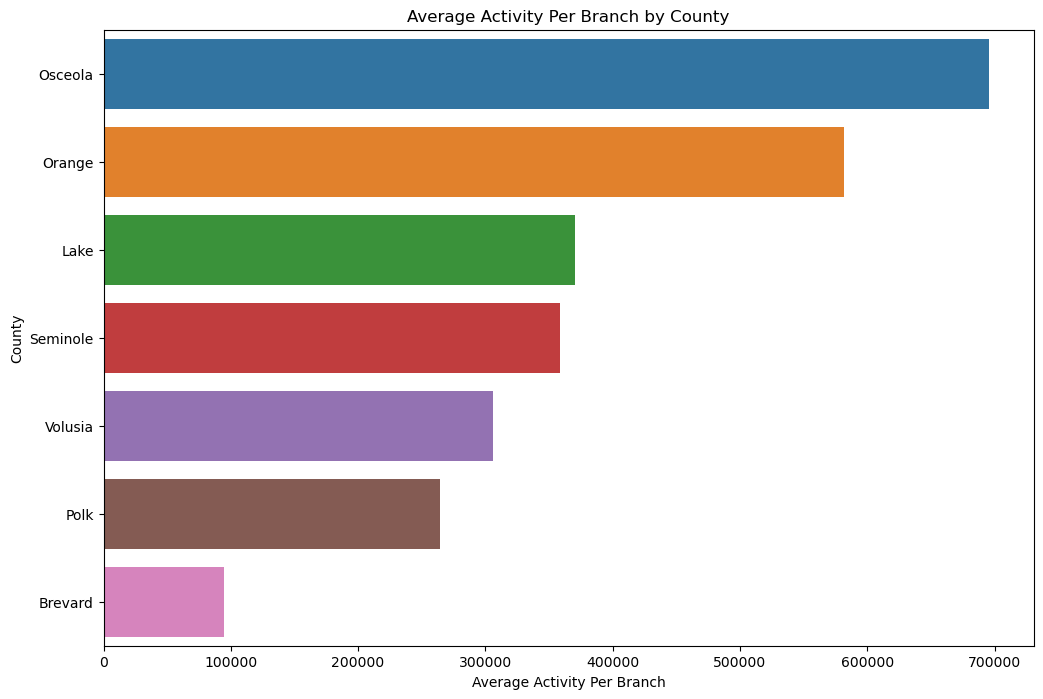

In [66]:
# Sorting counties by the average transactions per branch
county_activity_agg_sorted = county_activity_agg.sort_values(by='Average_Activity_Per_Branch', ascending=False)

# Displaying the counties with their average transaction data per branch
print(county_activity_agg_sorted[['County', 'Total_Activity', 'Branch_Count', 'Average_Activity_Per_Branch']])

# Visualization - Average Activity per Branch by County
plt.figure(figsize=(12, 8))
sns.barplot(y=county_activity_agg_sorted['County'], x=county_activity_agg_sorted['Average_Activity_Per_Branch'], )
plt.title('Average Activity Per Branch by County')
plt.ylabel('County')
plt.xlabel('Average Activity Per Branch')
plt.show()

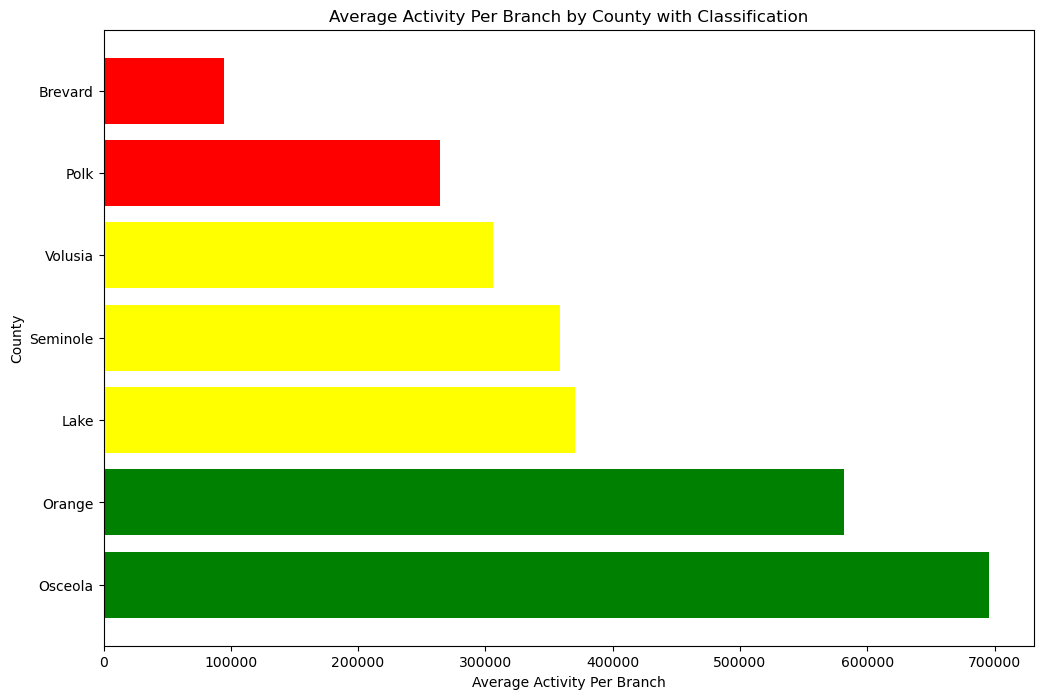

In [67]:
# Define classification thresholds
high_threshold = county_activity_agg_sorted['Average_Activity_Per_Branch'].quantile(0.75) # top 25%
medium_threshold = county_activity_agg_sorted['Average_Activity_Per_Branch'].quantile(0.25) # bottom 25%

# Classify counties
county_activity_agg_sorted['Classification'] = 'Low'
county_activity_agg_sorted.loc[county_activity_agg_sorted['Average_Activity_Per_Branch'] >= medium_threshold, 'Classification'] = 'Medium'
county_activity_agg_sorted.loc[county_activity_agg_sorted['Average_Activity_Per_Branch'] >= high_threshold, 'Classification'] = 'High'

# Visualize the classified data
colors = {'Low': 'red', 'Medium': 'yellow', 'High': 'green'}
plt.figure(figsize=(12, 8))
plt.barh(county_activity_agg_sorted['County'], county_activity_agg_sorted['Average_Activity_Per_Branch'], color=[colors[cls] for cls in county_activity_agg_sorted['Classification']])
plt.title('Average Activity Per Branch by County with Classification')
plt.xlabel('Average Activity Per Branch')
plt.ylabel('County')
plt.show()
